## Dependencies

In [1]:
!pip install tensorflow pandas matplotlib seaborn

In [2]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax
from tensorflow.keras.utils import to_categorical

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#### Normalize between 0-1

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
X_train.shape

(50000, 32, 32, 3)

#### Converting Categorical target to Numeric

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

## Model Architecture

In [8]:
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation = 'relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation = 'relu'),
        Dense(10, activation = 'softmax')
    ])

    return model

## SGD Without Momentum

In [9]:
model_sgd = create_model()

C:\Users\kalat\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Optimizer

In [10]:
sgd = SGD(learning_rate = 0.001, momentum = 0.0)

#### Model Configuration

In [11]:
model_sgd.compile(optimizer = sgd,
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

#### Model Training

In [12]:
history_sgd = model_sgd.fit(X_train, y_train, 
              batch_size = 64, 
              epochs = 10, 
              validation_data = (X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.1065 - loss: 2.2993 - val_accuracy: 0.1404 - val_loss: 2.2796
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.1584 - loss: 2.2713 - val_accuracy: 0.1744 - val_loss: 2.2430
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.1870 - loss: 2.2307 - val_accuracy: 0.2274 - val_loss: 2.1793
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.2258 - loss: 2.1596 - val_accuracy: 0.2541 - val_loss: 2.0955
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.2542 - loss: 2.0775 - val_accuracy: 0.2745 - val_loss: 2.0276
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.2675 - loss: 2.0208 - val_accuracy: 0.2750 - val_loss: 1.9888
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.2831 - loss: 1.9816 - val_accuracy: 0.2861 - val_loss: 1.9649
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.3005 - loss: 1.9596 - 

#### Evaluation

In [13]:
test_loss_sgd, test_acc_sgd = model_sgd.evaluate(X_test, y_test)     
print('Test Accuracy :', test_acc_sgd)          
print('Test Loss :', test_loss_sgd)  

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3314 - loss: 1.9026
Test Accuracy : 0.33250001072883606
Test Loss : 1.8964025974273682


## SGD With Momentum

In [14]:
model_sgd_mt = create_model()

#### Optimizer

In [15]:
sgd_mt = SGD(learning_rate = 0.001, momentum = 0.1)

#### Model Configuration

In [16]:
model_sgd_mt.compile(optimizer = sgd_mt,
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

#### Model Training

In [17]:
history_sgd_mt = model_sgd_mt.fit(X_train, y_train, 
              batch_size = 64, 
              epochs = 10, 
              validation_data = (X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.1485 - loss: 2.2845 - val_accuracy: 0.1836 - val_loss: 2.2420
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.1982 - loss: 2.2252 - val_accuracy: 0.2369 - val_loss: 2.1648
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.2321 - loss: 2.1443 - val_accuracy: 0.2592 - val_loss: 2.0724
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.2576 - loss: 2.0542 - val_accuracy: 0.2793 - val_loss: 2.0107
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.2825 - loss: 2.0009 - val_accuracy: 0.3025 - val_loss: 1.9740
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.2951 - loss: 1.9754 - val_accuracy: 0.3052 - val_loss: 1.9479
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.3048 - loss: 1.9465 - val_accuracy: 0.3185 - val_loss: 1.9206
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.3160 - loss: 1.9206 - 

#### Evaluation

In [18]:
test_loss_sgd_mt, test_acc_sgd_mt = model_sgd_mt.evaluate(X_test, y_test)     
print('Test Accuracy :', test_acc_sgd_mt)          
print('Test Loss :', test_loss_sgd_mt)  

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3488 - loss: 1.8581
Test Accuracy : 0.34950000047683716
Test Loss : 1.85219144821167


## Adam

In [19]:
model_adam = create_model()

#### Optimizer

In [20]:
adam = Adam(learning_rate=0.001)

#### Model Configuration

In [21]:
model_adam.compile(optimizer = adam,
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

#### Model Training

In [22]:
history_adam = model_adam.fit(X_train, y_train, 
              batch_size = 64, 
              epochs = 10, 
              validation_data = (X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.3872 - loss: 1.6873 - val_accuracy: 0.5681 - val_loss: 1.2091
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6029 - loss: 1.1328 - val_accuracy: 0.6229 - val_loss: 1.0625
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6563 - loss: 0.9907 - val_accuracy: 0.6728 - val_loss: 0.9534
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6972 - loss: 0.8754 - val_accuracy: 0.6793 - val_loss: 0.9424
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7273 - loss: 0.7868 - val_accuracy: 0.7046 - val_loss: 0.8784
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7536 - loss: 0.7115 - val_accuracy: 0.7041 - val_loss: 0.8637
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7741 - loss: 0.6484 - val_accuracy: 0.7108 - val_loss: 0.8560
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7973 - loss: 0.5817 - 

#### Evaluation

In [23]:
test_loss_adam, test_acc_adam = model_adam.evaluate(X_test, y_test)     
print('Test Accuracy :', test_acc_adam)          
print('Test Loss :', test_loss_adam)  

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7115 - loss: 0.9375
Test Accuracy : 0.7089999914169312
Test Loss : 0.9411476850509644


## RMSProp

In [24]:
model_rms = create_model()

#### Optimizer

In [25]:
rmsprop = RMSprop()

#### Model Configuration

In [26]:
model_rms.compile(optimizer = rmsprop,
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

#### Model Training

In [27]:
history_rms = model_rms.fit(X_train, y_train, 
              batch_size = 64, 
              epochs = 10, 
              validation_data = (X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.3400 - loss: 1.8177 - val_accuracy: 0.3758 - val_loss: 1.9122
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.5732 - loss: 1.2214 - val_accuracy: 0.5427 - val_loss: 1.3052
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6434 - loss: 1.0296 - val_accuracy: 0.5976 - val_loss: 1.1649
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.6826 - loss: 0.9142 - val_accuracy: 0.6620 - val_loss: 0.9794
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7210 - loss: 0.8060 - val_accuracy: 0.6840 - val_loss: 0.9295
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7541 - loss: 0.7017 - val_accuracy: 0.6556 - val_loss: 1.0364
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7862 - loss: 0.6232 - val_accuracy: 0.6954 - val_loss: 0.9455
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8064 - loss: 0.5615 - 

#### Evaluation

In [28]:
test_loss_rms, test_acc_rms = model_rms.evaluate(X_test, y_test)     
print('Test Accuracy :', test_acc_rms)          
print('Test Loss :', test_loss_rms)  

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7102 - loss: 1.0036
Test Accuracy : 0.7077999711036682
Test Loss : 1.0148118734359741


## AdaDelta

In [29]:
model_adadelta = create_model()

#### Model Configuration

In [30]:
model_adadelta.compile(optimizer = Adadelta(learning_rate = 0.001),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

#### Model Training

In [31]:
history_adadelta = model_adadelta.fit(X_train, y_train, 
              batch_size = 64, 
              epochs = 10, 
              validation_data = (X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.1061 - loss: 2.3038 - val_accuracy: 0.1258 - val_loss: 2.2934
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.1221 - loss: 2.2920 - val_accuracy: 0.1452 - val_loss: 2.2835
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.1484 - loss: 2.2821 - val_accuracy: 0.1664 - val_loss: 2.2745
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.1703 - loss: 2.2723 - val_accuracy: 0.1862 - val_loss: 2.2648
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.1839 - loss: 2.2632 - val_accuracy: 0.2018 - val_loss: 2.2547
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.1979 - loss: 2.2539 - val_accuracy: 0.2166 - val_loss: 2.2442
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.2176 - loss: 2.2424 - val_accuracy: 0.2270 - val_loss: 2.2328
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.2284 - loss: 2.2309 - 

#### Evaluation

In [32]:
test_loss_adadelta, test_acc_adadelta = model_adadelta.evaluate(X_test, y_test)     
print('Test Accuracy :', test_acc_adadelta)          
print('Test Loss :', test_loss_adadelta)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2600 - loss: 2.1950
Test Accuracy : 0.2547000050544739
Test Loss : 2.195260763168335


## AdaGrad

In [33]:
model_adagrad = create_model()

#### Model Configuration

In [34]:
model_adagrad.compile(optimizer = Adagrad(learning_rate = 0.001),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

#### Model Training

In [35]:
history_adagrad = model_adagrad.fit(X_train, y_train, 
              batch_size = 64, 
              epochs = 10, 
              validation_data = (X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.1273 - loss: 2.2863 - val_accuracy: 0.2145 - val_loss: 2.2139
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.2276 - loss: 2.1734 - val_accuracy: 0.2484 - val_loss: 2.0636
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.2823 - loss: 2.0288 - val_accuracy: 0.3131 - val_loss: 1.9665
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.3110 - loss: 1.9583 - val_accuracy: 0.3186 - val_loss: 1.9206
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.3305 - loss: 1.9109 - val_accuracy: 0.3401 - val_loss: 1.8800
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.3491 - loss: 1.8632 - val_accuracy: 0.3559 - val_loss: 1.8404
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.3602 - loss: 1.8283 - val_accuracy: 0.3676 - val_loss: 1.8079
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.3713 - loss: 1.7920 - 

#### Evaluation

In [36]:
test_loss_adagrad, test_acc_adagrad = model_adagrad.evaluate(X_test, y_test)     
print('Test Accuracy :', test_acc_adagrad)          
print('Test Loss :', test_loss_adagrad)  

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4151 - loss: 1.6913
Test Accuracy : 0.41359999775886536
Test Loss : 1.6851965188980103


## AdaMax

In [37]:
model_adamax = create_model()

#### Model Configuration

In [38]:
model_adamax.compile(optimizer = Adamax(learning_rate = 0.001),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

#### Model Training

In [39]:
history_adamax = model_adamax.fit(X_train, y_train, 
              batch_size = 64, 
              epochs = 10, 
              validation_data = (X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.3353 - loss: 1.8508 - val_accuracy: 0.4964 - val_loss: 1.4239
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.5244 - loss: 1.3570 - val_accuracy: 0.5584 - val_loss: 1.2627
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.5664 - loss: 1.2291 - val_accuracy: 0.5933 - val_loss: 1.1668
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6038 - loss: 1.1343 - val_accuracy: 0.6020 - val_loss: 1.1444
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6321 - loss: 1.0587 - val_accuracy: 0.6419 - val_loss: 1.0474
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6589 - loss: 0.9877 - val_accuracy: 0.6410 - val_loss: 1.0319
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6742 - loss: 0.9512 - val_accuracy: 0.6442 - val_loss: 1.0359
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6907 - loss: 0.9068 - 

#### Evaluation

In [40]:
test_loss_adamax, test_acc_adamax = model_adamax.evaluate(X_test, y_test)     
print('Test Accuracy :', test_acc_adamax)          
print('Test Loss :', test_loss_adamax)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6756 - loss: 0.9405
Test Accuracy : 0.6743000149726868
Test Loss : 0.9422420859336853


## Learning Rate


#### Learning Rate = 0.1

In [41]:
model_lr_01 = create_model()

##### Model Configuration

In [42]:
model_lr_01.compile(optimizer = Adam(learning_rate = 0.1),
                   loss = 'categorical_crossentropy',
                   metrics = ['accuracy'])

##### Model Training

In [43]:
history_01 = model_lr_01.fit(X_train, y_train, 
              batch_size = 64, 
              epochs = 10, 
              validation_data = (X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.0996 - loss: 12.5792 - val_accuracy: 0.1000 - val_loss: 2.3127
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.1002 - loss: 2.3108 - val_accuracy: 0.1000 - val_loss: 2.3065
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.1002 - loss: 2.3107 - val_accuracy: 0.1000 - val_loss: 2.3075
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.0980 - loss: 2.3115 - val_accuracy: 0.1000 - val_loss: 2.3177
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.0995 - loss: 2.3123 - val_accuracy: 0.1000 - val_loss: 2.3122
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.0986 - loss: 2.3125 - val_accuracy: 0.1000 - val_loss: 2.3082
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.1011 - loss: 2.3119 - val_accuracy: 0.1000 - val_loss: 2.3120
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.1009 - loss: 2.3116 -

##### Evaluation

In [44]:
test_loss_01, test_acc_01 = model_lr_01.evaluate(X_test, y_test)     
print('Test Accuracy :', test_acc_01)          
print('Test Loss :', test_loss_01)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0987 - loss: 2.3141
Test Accuracy : 0.10000000149011612
Test Loss : 2.312513589859009


#### Learning Rate = 0.01

In [45]:
model_lr_001 = create_model()

##### Model Configuration

In [46]:
model_lr_001.compile(optimizer = Adam(learning_rate = 0.01),
                   loss = 'categorical_crossentropy',
                   metrics = ['accuracy'])

##### Model Training

In [47]:
history_001 = model_lr_001.fit(X_train, y_train, 
              batch_size = 64, 
              epochs = 10, 
              validation_data = (X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.2627 - loss: 1.9970 - val_accuracy: 0.4218 - val_loss: 1.5829
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4333 - loss: 1.5594 - val_accuracy: 0.4511 - val_loss: 1.5463
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4617 - loss: 1.4854 - val_accuracy: 0.4525 - val_loss: 1.5533
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4833 - loss: 1.4337 - val_accuracy: 0.4914 - val_loss: 1.4272
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.4966 - loss: 1.4032 - val_accuracy: 0.4957 - val_loss: 1.4159
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.5112 - loss: 1.3667 - val_accuracy: 0.4972 - val_loss: 1.4363
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.5224 - loss: 1.3476 - val_accuracy: 0.4531 - val_loss: 1.5997
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.5319 - loss: 1.3192 - 

##### Evaluation

In [48]:
test_loss_001, test_acc_001 = model_lr_001.evaluate(X_test, y_test)     
print('Test Accuracy :', test_acc_001)          
print('Test Loss :', test_loss_001)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4891 - loss: 1.4383
Test Accuracy : 0.4952000081539154
Test Loss : 1.4325312376022339


#### Learning Rate = 0.001

In [49]:
model_lr_0001 = create_model()

##### Model Configuration

In [50]:
model_lr_0001.compile(optimizer = Adam(learning_rate = 0.001),
                   loss = 'categorical_crossentropy',
                   metrics = ['accuracy'])

##### Model Training

In [51]:
history_0001 = model_lr_0001.fit(X_train, y_train, 
              batch_size = 64, 
              epochs = 10, 
              validation_data = (X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.3857 - loss: 1.6914 - val_accuracy: 0.5709 - val_loss: 1.2198
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.5965 - loss: 1.1602 - val_accuracy: 0.6274 - val_loss: 1.0623
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.6553 - loss: 0.9955 - val_accuracy: 0.6587 - val_loss: 0.9794
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6923 - loss: 0.8803 - val_accuracy: 0.6605 - val_loss: 0.9747
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.7251 - loss: 0.7987 - val_accuracy: 0.6818 - val_loss: 0.9377
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7491 - loss: 0.7297 - val_accuracy: 0.6886 - val_loss: 0.9130
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7737 - loss: 0.6584 - val_accuracy: 0.6947 - val_loss: 0.9009
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7923 - loss: 0.5984 - 

##### Evaluation

In [52]:
test_loss_0001, test_acc_0001 = model_lr_0001.evaluate(X_test, y_test)     
print('Test Accuracy :', test_acc_0001)          
print('Test Loss :', test_loss_0001)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7116 - loss: 0.9189
Test Accuracy : 0.7080000042915344
Test Loss : 0.9344853758811951


#### Learning Rate = 0.0001

In [53]:
model_lr_00001 = create_model()

##### Model Configuration

In [54]:
model_lr_00001.compile(optimizer = Adam(learning_rate = 0.0001),
                   loss = 'categorical_crossentropy',
                   metrics = ['accuracy'])

##### Model Training

In [55]:
history_00001 = model_lr_00001.fit(X_train, y_train, 
              batch_size = 64, 
              epochs = 10, 
              validation_data = (X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.2716 - loss: 2.0213 - val_accuracy: 0.4491 - val_loss: 1.5850
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.4547 - loss: 1.5445 - val_accuracy: 0.4909 - val_loss: 1.4365
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.5062 - loss: 1.3991 - val_accuracy: 0.5276 - val_loss: 1.3352
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.5408 - loss: 1.3137 - val_accuracy: 0.5538 - val_loss: 1.2760
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.5664 - loss: 1.2380 - val_accuracy: 0.5705 - val_loss: 1.2256
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.5866 - loss: 1.1909 - val_accuracy: 0.5853 - val_loss: 1.1835
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.5979 - loss: 1.1506 - val_accuracy: 0.5966 - val_loss: 1.1542
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.6084 - loss: 1.1236 - 

##### Evaluation

In [56]:
test_loss_00001, test_acc_00001 = model_lr_00001.evaluate(X_test, y_test)     
print('Test Accuracy :', test_acc_00001)          
print('Test Loss :', test_loss_00001)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6256 - loss: 1.0835
Test Accuracy : 0.6209999918937683
Test Loss : 1.0887869596481323


## Comparative Analysis of Different Optimizers

In [57]:
print('Accuracy of SGD without Momentum  :', test_acc_sgd)          
print('Test Loss of SGD without Momentum :', test_loss_sgd) 
print('*'* 80)
print('Accuracy of SGD with    Momentum  :', test_acc_sgd_mt)          
print('Loss of SGD with Momentum         :', test_loss_sgd_mt)
print('*'* 80)
print('Accuracy of Adam                  :', test_acc_adam)
print('Loss of Adam                      :', test_loss_adam)
print('*'* 80)
print('Accuracy of RMSProp               :', test_acc_rms)
print('Loss of RMSProp                   :', test_loss_rms)
print('*'* 80)
print('Accuracy of AdaDelta              :', test_acc_adadelta)
print('Loss of AdaDelta                  :', test_loss_adadelta)
print('*'* 80)
print('Accuracy of AdaMax                :', test_acc_adamax)
print('Loss of AdaMax                    :', test_loss_adamax)
print('*'* 80)
print('Accuracy of AdaGrad               :', test_acc_adagrad)
print('Loss of AdaGrad                   :', test_loss_adagrad)

Accuracy of SGD without Momentum  : 0.33250001072883606
Test Loss of SGD without Momentum : 1.8964025974273682
********************************************************************************
Accuracy of SGD with    Momentum  : 0.34950000047683716
Loss of SGD with Momentum         : 1.85219144821167
********************************************************************************
Accuracy of Adam                  : 0.7089999914169312
Loss of Adam                      : 0.9411476850509644
********************************************************************************
Accuracy of RMSProp               : 0.7077999711036682
Loss of RMSProp                   : 1.0148118734359741
********************************************************************************
Accuracy of AdaDelta              : 0.2547000050544739
Loss of AdaDelta                  : 2.195260763168335
********************************************************************************
Accuracy of AdaMax                : 0.67430001

We Can see that Adam has highest accuracy followed by RMSprop and AdaMax,
On the Other hand AdaMax has lesser loss than RMSprop

## Comparative Analysis of Different Learning Rate

In [58]:
print('Accuracy When Learning Rate == 0.1    :', test_acc_01)
print('Loss When Learning Rate == 0.1        :', test_loss_01)
print('*' * 80)
print('Accuracy When Learning Rate == 0.01   :', test_acc_001)
print('Loss When Learning Rate == 0.01       :', test_loss_001)
print('*' * 80)
print('Accuracy When Learning Rate == 0.001  :', test_acc_0001)
print('Loss When Learning Rate == 0.001      :', test_loss_0001)
print('*' * 80)
print('Accuracy When Learning Rate == 0.0001 :', test_acc_00001)
print('Loss When Learning Rate == 0.0001     :', test_loss_00001)

Accuracy When Learning Rate == 0.1    : 0.10000000149011612
Loss When Learning Rate == 0.1        : 2.312513589859009
********************************************************************************
Accuracy When Learning Rate == 0.01   : 0.4952000081539154
Loss When Learning Rate == 0.01       : 1.4325312376022339
********************************************************************************
Accuracy When Learning Rate == 0.001  : 0.7080000042915344
Loss When Learning Rate == 0.001      : 0.9344853758811951
********************************************************************************
Accuracy When Learning Rate == 0.0001 : 0.6209999918937683
Loss When Learning Rate == 0.0001     : 1.0887869596481323


We Can see that accuracy is maximum when learning rate is 0.001 and is followed by 0.0001

### Visualization of Accuracy corresponding to Learning Rate

In [61]:
data = {
    'Learning Rate': [0.1, 0.01, 0.001, 0.0001],
    'Accuracy': [test_acc_01, test_acc_001, test_acc_0001, test_acc_00001]
}

df = pd.DataFrame(data)
df

,Learning Rate,Accuracy
0,0.1000,0.1000
1,0.0100,0.4952
2,0.0010,0.7080
3,0.0001,0.6210


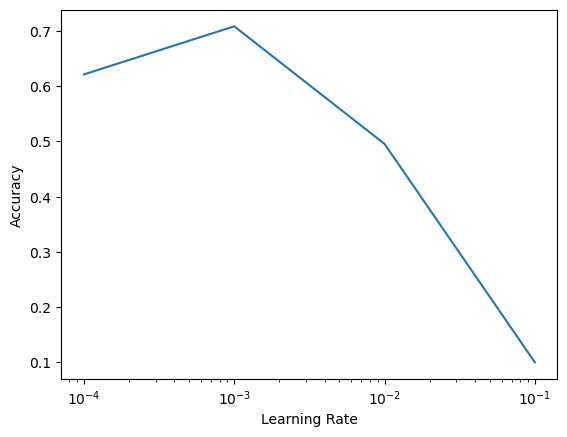

In [62]:
sns.lineplot(data = data, x = 'Learning Rate', y = 'Accuracy')
plt.xscale('log')
plt.show()